In [1]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


n_clusters = 5

#read image
img = cv2.imread("images/bell-pepper.jpg")

#reshape to a list of pixels
flat_img = img.reshape((-1, 3))

#using k-means to cluster pixels
kmeans = KMeans(n_clusters = n_clusters)
kmeans.fit(flat_img)

#the cluster centers are our dominant colors.
dominant_colors = np.array(kmeans.cluster_centers_, dtype='uint8')

labels = kmeans.labels_

print(dominant_colors)
print(labels)

c:\users\parsa\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[ 10 139  77]
 [  2 179 245]
 [  2  58  21]
 [ 28  59 183]
 [129 188 227]]
[3 3 3 ... 2 2 2]


In [2]:
np.bincount(labels)#number of pixels for each cluster

array([138357, 319887, 264468, 199662,  26106], dtype=int64)

In [4]:
percentages = np.bincount(labels)/len(flat_img)
percentages# percentage of each cluster in our image 

array([0.14587234, 0.33726278, 0.2788335 , 0.21050734, 0.02752404])

In [7]:
p_and_c = zip(percentages,dominant_colors)
p_and_c = sorted(p_and_c,reverse=True)
p_and_c             

[(0.33726277834008095, array([  2, 179, 245], dtype=uint8)),
 (0.2788335020242915, array([ 2, 58, 21], dtype=uint8)),
 (0.21050733805668015, array([ 28,  59, 183], dtype=uint8)),
 (0.1458723431174089, array([ 10, 139,  77], dtype=uint8)),
 (0.02752403846153846, array([129, 188, 227], dtype=uint8))]

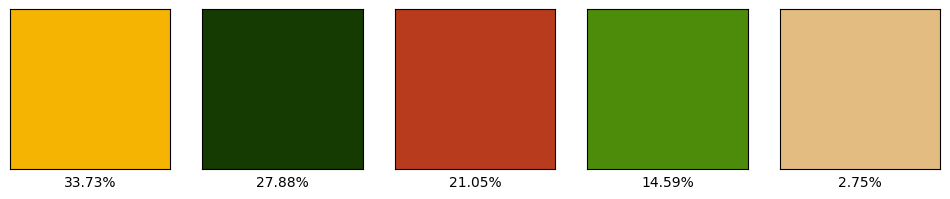

In [8]:
block = np.ones((50,50,3),dtype='uint')
plt.figure(figsize=(12,8))
for i in range(n_clusters):
    plt.subplot(1,n_clusters,i+1)
    block[:] = p_and_c[i][1][::-1] # we have done this to convert bgr(opencv) to rgb(matplotlib) 
    plt.imshow(block)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(str(round(p_and_c[i][0]*100,2))+'%')

([], [])

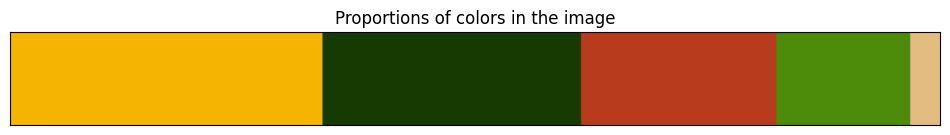

In [9]:
bar = np.ones((50,500,3),dtype='uint')
plt.figure(figsize=(12,8))
plt.title('Proportions of colors in the image')
start = 0
i = 1
for p,c in p_and_c:
    end = start+int(p*500)
    if i==n_clusters:
        bar[:,start:] = c[::-1]
    else:
        bar[:,start:end] = c[::-1]
    start = end
    i+=1

plt.imshow(bar)
plt.xticks([])
plt.yticks([])
